## This notebook generates a **Chord Diagram** from 3 csv files with specific formats

data_chromosome_general.csv
``` 
    chr,start,end
    chr1,1,249250621
```
data_links.csv
```
    chr1,start1,end1,chr2,start2,end2
    chr20,37720821,47419255,chr5,162124929,168434522
```
example_data_chromosome_cytoband.csv
```
    chr,start,end,value1,value2
    chr1,1,2300000,p36.33,gneg
```
--------------------------
## Notes:
This code uses a default colormap. 
In order to generate any plot MUST run Create_just_Circle() first, this
sets up the start and end for the arcs.

[Original Tutorial](https://github.com/ponnhide/pyCircos/blob/master/tutorial/tutorial.ipynb)



In [34]:
import pycircos
#
# Get data from input_files
def get_start_end_data(filename,make_small=1):
    ''' Open the filename and create a list of network data.
        filename: The name of the file to open
        make_small: integer for debug
    '''
    with open(filename) as f:
        l = []
        f.readline()
        for line in f:
            line   = line.rstrip().split(",") 
            name   = line[0]
            length = int(int(line[-1])/make_small)
            l.append((name,length))
        return l

def get_link_data(filename):
    ''' Open the filename and create a list of link data.'''
    arc_length = 1000 # this extends the arcs to the outer circle
    # arc_length = 630 # this will reach part way
    with open(filename) as f:
        l = []
        f.readline()
        for line in f:
            line  = line.rstrip().split(",")
            name1  = line[0]     
            start1 = int(line[1])-1
            end1   = int(line[2])
            name2  = line[3]     
            start2 = int(line[4])-1
            end2   = int(line[5])
            source = (name1, start1, end1, arc_length)
            destination = (name2, start2, end2, arc_length)
            l.append((source,destination,name1))
        return l

def get_bar_data( input_file, color_dict ):
    ''' Plot color bars on outer arcs, must have enough colors defined.
        Warning will print if color is missing but plot will still display.'''
    import collections

    arcs = collections.defaultdict(dict)
    err_msg_list = []
    with open("example_data_chromosome_cytoband.csv") as f:
        f.readline()
        for line in f:
            line  = line.rstrip().split(",")
            name  = line[0]     
            start = int(line[1])-1 
            width = int(line[2])-(int(line[1])-1) 
            color_key = line[-1]
            if name not in arcs:
                arcs[name]["positions"] = []
                arcs[name]["widths"] = [] 
                arcs[name]["colors"] = [] 
            arcs[name]["positions"].append(start) 
            arcs[name]["widths"].append(width)
            try:
                arcs[name]["colors"].append(color_dict[color_key])
            except KeyError:
                if color_key not in err_msg_list:
                    err_msg_list.append(color_key)

    if err_msg_list:
        print("WARNING: missing color(s) for: ",err_msg_list)
    return arcs
#
# Plot data on circle
def plot_links(circle,links):
    ''' draw the links on the circle'''
    for source, destination, name1 in links:
        circle.chord_plot(source, destination, facecolor=circle.garc_dict[name1].facecolor)
    return circle

def plot_bars( circle, data ):
    print("*** Barplot takes ~33 seconds to generate.")
    for key in data:
        circle.barplot(key, data=[1]*len(data[key]["positions"]), positions=data[key]["positions"], 
                    width=data[key]["widths"], raxis_range=[950,1000], facecolor=data[key]["colors"])    

def get_circle(data):
    ''' return circle figure '''
    circ = pycircos.Gcircle() 
    for name,length in data:
        arcc = pycircos.Garc(arc_id=name, size=length, interspace=2, raxis_range=(950,1000), labelposition=60, label_visible=True)
        circ.add_garc(arcc) 
    return circ

def Create_just_Circle( start_end_file):
    ''' TEST PURPOSES ONLY.
        create a chord diagram using files.
        requires start_end_file'''
    start_end_data = get_start_end_data( start_end_file )
    circ = get_circle(start_end_data)
    circ.set_garcs(0,360) # this displays the circle
    return circ


def Create_Chord_Diagram( start_end_file, links_file=None, 
    bar_file=None, bar_color_dict=None):
    ''' create a chord diagram using files.
        requires start_end_file.
        If no links_file or bar_file then just draws circle.
        If bar file - then MUST specify color dictiionary or just black lines will be drawn.'''
    start_end_data = get_start_end_data( start_end_file )
    circ = get_circle(start_end_data)
    circ.set_garcs(0,360) # this displays the circle

    if links_file:
        link_data = get_link_data( links_file )
        circ = plot_links(circ,link_data)  
    
    if bar_file:
        bar_data = get_bar_data( bar_file, bar_color_dict )
        circ = plot_bars( circ, bar_data )

    return circ


### The next cell generates the Chord Diagram.

*** Barplot takes ~33 seconds to generate.


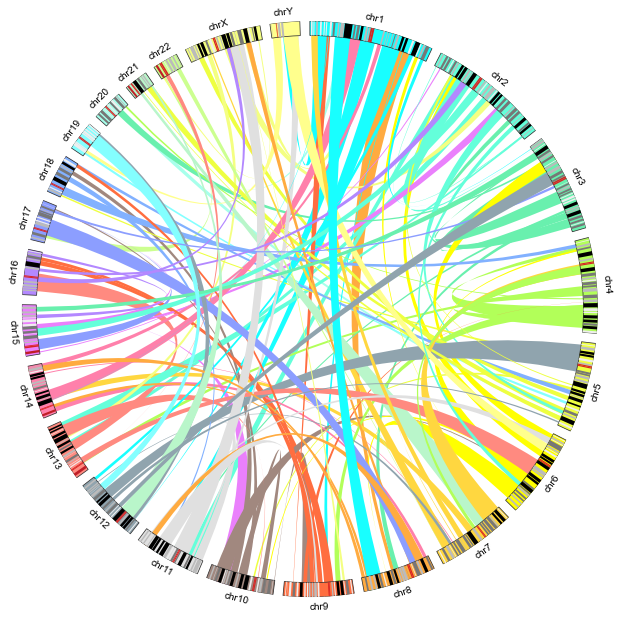

In [35]:
start_end_file = 'data_chromosome_general.csv'
link_file = 'data_links.csv'
bar_file = 'data_chromosome_general.csv'
bar_colors   = {"gneg":"#FFFFFF00", "gpos25":"#EEEEEE", "gpos50":"#BBBBBB", "gpos75":"#777777", "gpos100":"#000000", "gvar":"#FFFFFF00", "stalk":"#C01E27", 
               "acen":"#D82322"}
circle = Create_Chord_Diagram( start_end_file, link_file, bar_file, bar_colors ) 